<a href="https://colab.research.google.com/github/nguyetmle/voting-distortion/blob/main/Voting_Distortion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:

from VoteRules3D import VoteResult3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib as mpl

style.use('ggplot')
style.use('tableau-colorblind10')
style.use('seaborn-v0_8-paper')




In [28]:

def simulate(numTest,n,m,dimension):
    dict = {"n":[], "m":[], "Dimension":[], "Plurality":[], "Plurality Condorcet Criterion":[],
    "Copeland":[], "Copeland Condorcet Criterion":[], "STV":[], "STV Condorcet Criterion":[],
    "Borda":[], "Borda Condorcet Criterion":[], "STAR":[], "STAR Condorcet Criterion":[], "Plurality Veto": [], "Plurality Veto Condorcet Criterion": []}
    for i in range(numTest):
        test = VoteResult3D(n, m, dimension)
        dict["n"].append(n)
        dict["m"].append(m)
        dict["Dimension"].append(test.dimension)
        

        #winners 
        plurality = test.plurality()
        copeland = test.copeland()
        stv = test.STV()
        borda = test.borda()
        star = test.STAR()
        veto = test.pluralityVeto()
        dict["Plurality"].append(plurality)
        dict["Copeland"].append(copeland)
        dict["STV"].append(stv)
        dict["Borda"].append(borda)
        dict["STAR"].append(star)
        dict["Plurality Veto"].append(veto)

        dict["Plurality Condorcet Criterion"].append(test.condorcetCheck(plurality))
        dict["Copeland Condorcet Criterion"].append(test.condorcetCheck(copeland))
        dict["STV Condorcet Criterion"].append(test.condorcetCheck(stv))
        dict["Borda Condorcet Criterion"].append(test.condorcetCheck(borda))
        dict["STAR Condorcet Criterion"].append(test.condorcetCheck(star))
        dict["Plurality Veto Condorcet Criterion"].append(test.condorcetCheck(veto))

        

        
    df = pd.DataFrame(dict)
    df.to_csv('CondorcetCheck.csv', mode="a", header = None)

# Now you have a DataFrame df with the results of your simulations


In [30]:
dimension = ["2D", "3D"]
n=200
marray = [2,3,5]

# for d in dimension:
simulate(1000, n, 5, "3D")



KeyboardInterrupt: 

In [14]:
main = pd.read_csv("CondorcetCheck.csv")

main.tail(10)

,Unnamed: 0,n,m,Dimension,Plurality,Plurality Condorcet Criterion,Copeland,Copeland Condorcet Criterion,STV,STV Condorcet Criterion,Borda,Borda Condorcet Criterion,STAR,STAR Condorcet Criterion,Plurality Veto,Plurality Veto Condorcet Criterion
13990,990,200,50,3D,Candidate 4,False,Candidate 15,True,Candidate 7,False,Candidate 15,True,Candidate 40,False,Candidate 15,True
13991,991,200,50,3D,Candidate 3,False,Candidate 42,True,Candidate 1,False,Candidate 42,True,Candidate 19,False,Candidate 42,True
13992,992,200,50,3D,Candidate 19,False,Candidate 33,True,Candidate 38,False,Candidate 33,True,Candidate 33,True,Candidate 33,True
13993,993,200,50,3D,Candidate 0,NaN,Candidate 17,NaN,Candidate 45,NaN,Candidate 17,NaN,Candidate 17,NaN,Candidate 45,NaN
13994,994,200,50,3D,Candidate 18,False,Candidate 24,True,Candidate 24,True,Candidate 24,True,Candidate 24,True,Candidate 24,True
13995,995,200,50,3D,Candidate 21,False,Candidate 36,True,Candidate 36,True,Candidate 36,True,Candidate 36,True,Candidate 36,True
13996,996,200,50,3D,Candidate 13,False,Candidate 34,True,Candidate 32,False,Candidate 34,True,Candidate 40,False,Candidate 34,True
13997,997,200,50,3D,Candidate 6,False,Candidate 14,True,Candidate 14,True,Candidate 1,False,Candidate 28,False,Candidate 14,True
13998,998,200,50,3D,Candidate 18,False,Candidate 36,True,Candidate 27,False,Candidate 36,True,Candidate 27,False,Candidate 36,True
13999,999,200,50,3D,Candidate 28,False,Candidate 11,True,Candidate 22,False,Candidate 11,True,Candidate 23,False,Candidate 23,False


In [25]:
# Assuming you have a DataFrame 'main' and a target value 'True'
target_value = True

# Group by 'Distribution' and calculate the percentage of each method choosing the OPT
condorcetCheck = main.loc[main["Dimension"] == "3D"].groupby("m").agg(
    Plurality_percentage=('Plurality Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    Copeland_percentage=('Copeland Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    STV_percentage=('STV Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    STAR_percentage=('STAR Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    Borda_percentage=('Borda Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    PluralityVeto_percentage=('Plurality Veto Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100)
).reset_index()

condorcetCheck

,m,Plurality_percentage,Copeland_percentage,STV_percentage,STAR_percentage,Borda_percentage,PluralityVeto_percentage
0,20,21.580547,100.0,41.438703,37.183384,85.207700,71.327254
1,50,5.445026,100.0,14.345550,22.094241,83.874346,58.219895


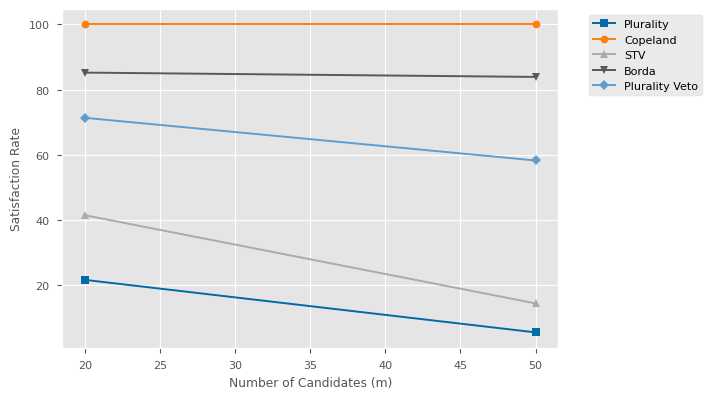

In [26]:
# import matplotlib.pyplot as plt
# df = condorcetCheck
# # List of columns you want to compare
# columns_to_compare = ["Plurality_percentage", "Copeland_percentage", "STV_percentage", "STAR_percentage", "Borda_percentage", "PluralityVeto_percentage"]

# # Transpose the DataFrame
# df = df.set_index("Dimension")[columns_to_compare].T

# # Plotting
# ax = df.plot(kind="bar", figsize=(10, 6))
# plt.xlabel("Method")
# plt.ylabel("Percentage")
# plt.title("Comparison of Percentages by Method and Dimension")
# plt.legend(title="Dimension", loc="upper left", bbox_to_anchor=(1, 1))
# plt.tight_layout()
# plt.show()

#color palatte for the colorblind
CB_color_cycle = ['#006BA4', '#FF800E', '#ABABAB', '#595959',
                 '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']
styles1 = ['s-','o-','^-', 'v-','D-']


plt.plot(condorcetCheck.m, condorcetCheck["Plurality_percentage"], styles1[0], label="Plurality", color = CB_color_cycle[0])
plt.plot(condorcetCheck.m, condorcetCheck["Copeland_percentage"], styles1[1], label="Copeland",  color = CB_color_cycle[1])
plt.plot(condorcetCheck.m, condorcetCheck["STV_percentage"], styles1[2], label="STV", color = CB_color_cycle[2])
plt.plot(condorcetCheck.m, condorcetCheck["Borda_percentage"], styles1[3], label="Borda", color = CB_color_cycle[3])
plt.plot(condorcetCheck.m, condorcetCheck["PluralityVeto_percentage"], styles1[4], label="Plurality Veto", color = CB_color_cycle[4])

# Customize the plot
plt.xlabel("Number of Candidates (m)")
plt.ylabel("Satisfaction Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()